# Base Model

## Dataset Access

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier  # You can replace with any model
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import RepeatedStratifiedKFold

#from xgboost import XGBClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import math as mt
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as ltb
import xgboost as xgb
%matplotlib inline

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


In [78]:
Breast_cancer=pd.read_csv(r"C:\Users\amits\OneDrive\Documents\Project_286_final\breast-cancer286.csv")
print(Breast_cancer.head())

     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  40-49   premeno      15-19       0-2       yes          3  right   
1  50-59      ge40      15-19       0-2        no          1  right   
2  50-59      ge40      35-39       0-2        no          2   left   
3  40-49   premeno      35-39       0-2       yes          3  right   
4  40-49   premeno      30-34       3-5       yes          2   left   

  breast-quad irradiat                 Class  
0     left_up       no     recurrence-events  
1     central       no  no-recurrence-events  
2    left_low       no     recurrence-events  
3    left_low      yes  no-recurrence-events  
4    right_up       no     recurrence-events  


## Null check and using mode nan replacing

In [79]:
Breast_cancer.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [80]:
Breast_cancer_cleaned = Breast_cancer.copy()

for column in Breast_cancer_cleaned.columns:
    mode_value = Breast_cancer_cleaned[column].mode()[0]
    Breast_cancer_cleaned[column] = Breast_cancer_cleaned[column].fillna(mode_value)


In [81]:
Breast_cancer_cleaned

age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0    40-49   premeno      15-19       0-2       yes          3  right   
1    50-59      ge40      15-19       0-2        no          1  right   
2    50-59      ge40      35-39       0-2        no          2   left   
3    40-49   premeno      35-39       0-2       yes          3  right   
4    40-49   premeno      30-34       3-5       yes          2   left   
..     ...       ...        ...       ...       ...        ...    ...   
281  50-59      ge40      30-34       6-8       yes          2   left   
282  50-59   premeno      25-29       3-5       yes          2   left   
283  30-39   premeno      30-34       6-8       yes          2  right   
284  50-59   premeno      15-19       0-2        no          2  right   
285  50-59      ge40      40-44       0-2        no          3   left   

    breast-quad irradiat                 Class  
0       left_up       no     recurrence-events  
1       central       no  no-recurrence-events  
2      left_low       no     recurrence-events  
3      left_low      yes  no-recurrence-events  
4      right_up       no     recurrence-events  
..          ...      ...                   ...  
281    left_low       no  no-recurrence-events  
282    left_low      yes  no-recurrence-events  
283    right_up       no  no-recurrence-events  
284    left_low       no  no-recurrence-events  
285    right_up       no  no-recurrence-events  

[286 rows x 10 columns]

In [82]:
Breast_cancer_cleaned.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

## Convert column object to categorical data all

In [83]:
Breast_cancer_cleaned_cols = Breast_cancer_cleaned.select_dtypes(include='object').columns
for col in Breast_cancer_cleaned_cols:
    Breast_cancer_cleaned[col] = pd.Categorical(Breast_cancer_cleaned[col])
print(Breast_cancer_cleaned.dtypes)


age            category
menopause      category
tumor-size     category
inv-nodes      category
node-caps      category
deg-malig         int64
breast         category
breast-quad    category
irradiat       category
Class          category
dtype: object


In [84]:
print(Breast_cancer_cleaned.dtypes)

age            category
menopause      category
tumor-size     category
inv-nodes      category
node-caps      category
deg-malig         int64
breast         category
breast-quad    category
irradiat       category
Class          category
dtype: object


## Label Encoding

In [85]:
le = LabelEncoder()
for col in Breast_cancer_cleaned.select_dtypes(include='category').columns:
    Breast_cancer_cleaned[col] = le.fit_transform(Breast_cancer_cleaned[col])


## Kfold

In [86]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# ✅ Define features and target
x = Breast_cancer_cleaned.drop('Class', axis=1)
Y = Breast_cancer_cleaned['Class']

# ✅ Convert to NumPy arrays
x_np = x.to_numpy()
Y_np = Y.to_numpy()

# ✅ Set up Stratified K-Fold
SKF = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# ✅ Initialize model
model = LogisticRegression(max_iter=1000, random_state=42)

# 🔁 10-Fold Loop with accuracy collection
fold = 1
accuracies = []

for train_idx, val_idx in SKF.split(x_np, Y_np):
    x_train, x_val = x_np[train_idx], x_np[val_idx]
    Y_train, Y_val = Y_np[train_idx], Y_np[val_idx]

    model.fit(x_train, Y_train)
    Y_pred = model.predict(x_val)

    acc = accuracy_score(Y_val, Y_pred)
    accuracies.append(acc)

    print(f"🔂 Fold {fold}")
    print(f"   🏋️‍♂️ Train indices: {train_idx[:5]} ... ({len(train_idx)} samples)")
    print(f"   📏 Val indices: {val_idx[:5]} ... ({len(val_idx)} samples)")
    print(f"   🎯 Accuracy: {acc:.4f}\n")

    fold += 1

# 📊 Final Accuracy Summary
print("📈 Accuracy Summary Across 10 Folds:")
print(f"   🔹 Average Accuracy: {np.mean(accuracies):.4f}")
print(f"   🔹 Max Accuracy: {np.max(accuracies):.4f}")
print(f"   🔹 Min Accuracy: {np.min(accuracies):.4f}")


🔂 Fold 1
   🏋️‍♂️ Train indices: [0 3 4 5 7] ... (257 samples)
   📏 Val indices: [ 1  2  6 18 19] ... (29 samples)
   🎯 Accuracy: 0.7241

🔂 Fold 2
   🏋️‍♂️ Train indices: [0 1 2 4 5] ... (257 samples)
   📏 Val indices: [ 3 12 20 25 29] ... (29 samples)
   🎯 Accuracy: 0.7931

🔂 Fold 3
   🏋️‍♂️ Train indices: [0 1 2 3 4] ... (257 samples)
   📏 Val indices: [ 7 14 17 23 27] ... (29 samples)
   🎯 Accuracy: 0.7241

🔂 Fold 4
   🏋️‍♂️ Train indices: [0 1 2 3 4] ... (257 samples)
   📏 Val indices: [10 22 48 50 51] ... (29 samples)
   🎯 Accuracy: 0.7586

🔂 Fold 5
   🏋️‍♂️ Train indices: [0 1 2 3 4] ... (257 samples)
   📏 Val indices: [ 9 15 43 44 47] ... (29 samples)
   🎯 Accuracy: 0.7241

🔂 Fold 6
   🏋️‍♂️ Train indices: [0 1 2 3 4] ... (257 samples)
   📏 Val indices: [11 32 33 37 39] ... (29 samples)
   🎯 Accuracy: 0.7241

🔂 Fold 7
   🏋️‍♂️ Train indices: [0 1 2 3 4] ... (258 samples)
   📏 Val indices: [13 60 63 80 82] ... (28 samples)
   🎯 Accuracy: 0.7500

🔂 Fold 8
   🏋️‍♂️ Train indices: [

## Classification

In [87]:
# ✅ Define features and target
x = Breast_cancer_cleaned.drop('Class', axis=1)
Y = Breast_cancer_cleaned['Class']
# 🧠 Define classifiers
classify = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 🧮 Store results
results = {}

# 🔁 Perform 10-Fold Cross-Validation
print("🔁 10-Fold Cross-Validation Accuracies:\n")

for name, model in classify.items():
    fold_accuracies = []
    
    for train_idx, val_idx in SKF.split(x_np, Y_np):
        x_train, x_val = x_np[train_idx], x_np[val_idx]
        Y_train, Y_val = Y_np[train_idx], Y_np[val_idx]
        
        model.fit(x_train, Y_train)
        Y_pred = model.predict(x_val)
        accu = accuracy_score(Y_val, Y_pred)
        fold_accuracies.append(accu)
    
    mean_acc = np.mean(fold_accuracies)
    std_acc = np.std(fold_accuracies)
    results[name] = mean_acc

    print(f"✅ {name}")
    print(f"   🔹 Mean Accuracy: {mean_acc:.4f}")
    print(f"   🔹 Std Dev: {std_acc:.4f}\n")

# 🔝 Print highest accuracy classifier(s)
best_acc = max(results.values())
print("🏆 Classifier(s) with the Highest Mean Accuracy:\n")
for clf_name, acc in results.items():
    if acc == best_acc:
        print(f"✅ {clf_name} → 🔝 Accuracy: {acc:.4f}")


🔁 10-Fold Cross-Validation Accuracies:

✅ Logistic Regression
   🔹 Mean Accuracy: 0.7234
   🔹 Std Dev: 0.0678

✅ K-Nearest Neighbors
   🔹 Mean Accuracy: 0.6953
   🔹 Std Dev: 0.0644

✅ Support Vector Machine
   🔹 Mean Accuracy: 0.7270
   🔹 Std Dev: 0.0530

✅ Naive Bayes
   🔹 Mean Accuracy: 0.7268
   🔹 Std Dev: 0.0934

✅ Decision Tree
   🔹 Mean Accuracy: 0.6115
   🔹 Std Dev: 0.0909

✅ Random Forest
   🔹 Mean Accuracy: 0.7126
   🔹 Std Dev: 0.0528

✅ AdaBoost
   🔹 Mean Accuracy: 0.7195
   🔹 Std Dev: 0.0584

✅ Gradient Boosting
   🔹 Mean Accuracy: 0.6953
   🔹 Std Dev: 0.0520

🏆 Classifier(s) with the Highest Mean Accuracy:

✅ Support Vector Machine → 🔝 Accuracy: 0.7270


In [88]:
Breast_cancer_cleaned

age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      2          2           2          0          1          3       1   
1      3          0           2          0          0          1       1   
2      3          0           6          0          0          2       0   
3      2          2           6          0          1          3       1   
4      2          2           5          4          1          2       0   
..   ...        ...         ...        ...        ...        ...     ...   
281    3          0           5          5          1          2       0   
282    3          2           4          4          1          2       0   
283    1          2           5          5          1          2       1   
284    3          2           2          0          0          2       1   
285    3          0           7          0          0          3       0   

     breast-quad  irradiat  Class  
0              2         0      1  
1              0         0      0  
2              1         0      1  
3              1         1      0  
4              4         0      1  
..           ...       ...    ...  
281            1         0      0  
282            1         1      0  
283            4         0      0  
284            1         0      0  
285            4         0      0  

[286 rows x 10 columns]

# Propose Model

## Data access

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier  # You can replace with any model
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import RepeatedStratifiedKFold

#from xgboost import XGBClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import math as mt
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as ltb
import xgboost as xgb
%matplotlib inline

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


In [90]:
dataset286=pd.read_csv(r"C:\Users\amits\OneDrive\Documents\Project_286_final\breast-cancer286.csv")
print(dataset286.head())

     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  40-49   premeno      15-19       0-2       yes          3  right   
1  50-59      ge40      15-19       0-2        no          1  right   
2  50-59      ge40      35-39       0-2        no          2   left   
3  40-49   premeno      35-39       0-2       yes          3  right   
4  40-49   premeno      30-34       3-5       yes          2   left   

  breast-quad irradiat                 Class  
0     left_up       no     recurrence-events  
1     central       no  no-recurrence-events  
2    left_low       no     recurrence-events  
3    left_low      yes  no-recurrence-events  
4    right_up       no     recurrence-events  


In [91]:
dataset286

age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0    40-49   premeno      15-19       0-2       yes          3  right   
1    50-59      ge40      15-19       0-2        no          1  right   
2    50-59      ge40      35-39       0-2        no          2   left   
3    40-49   premeno      35-39       0-2       yes          3  right   
4    40-49   premeno      30-34       3-5       yes          2   left   
..     ...       ...        ...       ...       ...        ...    ...   
281  50-59      ge40      30-34       6-8       yes          2   left   
282  50-59   premeno      25-29       3-5       yes          2   left   
283  30-39   premeno      30-34       6-8       yes          2  right   
284  50-59   premeno      15-19       0-2        no          2  right   
285  50-59      ge40      40-44       0-2        no          3   left   

    breast-quad irradiat                 Class  
0       left_up       no     recurrence-events  
1       central       no  no-recurrence-events  
2      left_low       no     recurrence-events  
3      left_low      yes  no-recurrence-events  
4      right_up       no     recurrence-events  
..          ...      ...                   ...  
281    left_low       no  no-recurrence-events  
282    left_low      yes  no-recurrence-events  
283    right_up       no  no-recurrence-events  
284    left_low       no  no-recurrence-events  
285    right_up       no  no-recurrence-events  

[286 rows x 10 columns]

## Null Check

In [92]:
dataset286.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

## Using Mode Nan Replacing

In [93]:
dataset286_cleaned = dataset286.copy()

for column in dataset286_cleaned.columns:
    mode_value = dataset286_cleaned[column].mode()[0]
    dataset286_cleaned[column] = dataset286_cleaned[column].fillna(mode_value)


In [94]:
dataset286_cleaned

age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0    40-49   premeno      15-19       0-2       yes          3  right   
1    50-59      ge40      15-19       0-2        no          1  right   
2    50-59      ge40      35-39       0-2        no          2   left   
3    40-49   premeno      35-39       0-2       yes          3  right   
4    40-49   premeno      30-34       3-5       yes          2   left   
..     ...       ...        ...       ...       ...        ...    ...   
281  50-59      ge40      30-34       6-8       yes          2   left   
282  50-59   premeno      25-29       3-5       yes          2   left   
283  30-39   premeno      30-34       6-8       yes          2  right   
284  50-59   premeno      15-19       0-2        no          2  right   
285  50-59      ge40      40-44       0-2        no          3   left   

    breast-quad irradiat                 Class  
0       left_up       no     recurrence-events  
1       central       no  no-recurrence-events  
2      left_low       no     recurrence-events  
3      left_low      yes  no-recurrence-events  
4      right_up       no     recurrence-events  
..          ...      ...                   ...  
281    left_low       no  no-recurrence-events  
282    left_low      yes  no-recurrence-events  
283    right_up       no  no-recurrence-events  
284    left_low       no  no-recurrence-events  
285    right_up       no  no-recurrence-events  

[286 rows x 10 columns]

In [95]:
dataset286_cleaned.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [96]:
dataset286_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    286 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [97]:
'''for col in dataset286_cleaned.select_dtypes(include='object').columns:
    dataset286_cleaned[col] = dataset286_cleaned[col].astype('category')'''


"for col in dataset286_cleaned.select_dtypes(include='object').columns:\n    dataset286_cleaned[col] = dataset286_cleaned[col].astype('category')"

## Convert column object to categorical data all

In [98]:
object_cols = dataset286_cleaned.select_dtypes(include='object').columns
for col in object_cols:
    dataset286_cleaned[col] = pd.Categorical(dataset286_cleaned[col])
print(dataset286_cleaned.dtypes)


age            category
menopause      category
tumor-size     category
inv-nodes      category
node-caps      category
deg-malig         int64
breast         category
breast-quad    category
irradiat       category
Class          category
dtype: object


In [99]:
print(dataset286_cleaned.dtypes)

age            category
menopause      category
tumor-size     category
inv-nodes      category
node-caps      category
deg-malig         int64
breast         category
breast-quad    category
irradiat       category
Class          category
dtype: object


## Label Encoding

In [100]:
le = LabelEncoder()
for col in dataset286_cleaned.select_dtypes(include='category').columns:
    dataset286_cleaned[col] = le.fit_transform(dataset286_cleaned[col])


In [101]:
dataset286_cleaned

age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      2          2           2          0          1          3       1   
1      3          0           2          0          0          1       1   
2      3          0           6          0          0          2       0   
3      2          2           6          0          1          3       1   
4      2          2           5          4          1          2       0   
..   ...        ...         ...        ...        ...        ...     ...   
281    3          0           5          5          1          2       0   
282    3          2           4          4          1          2       0   
283    1          2           5          5          1          2       1   
284    3          2           2          0          0          2       1   
285    3          0           7          0          0          3       0   

     breast-quad  irradiat  Class  
0              2         0      1  
1              0         0      0  
2              1         0      1  
3              1         1      0  
4              4         0      1  
..           ...       ...    ...  
281            1         0      0  
282            1         1      0  
283            4         0      0  
284            1         0      0  
285            4         0      0  

[286 rows x 10 columns]

## Outlier Detection and Remove

In [102]:
dataset286_cleaned = dataset286_cleaned.copy()
# Convert all categorical columns to numerical using factorize
for col in dataset286_cleaned.select_dtypes(include=['category']).columns:
    dataset286_cleaned[col] = pd.factorize(dataset286_cleaned[col])[0]

# ✅ Optional: If 'Class' is the target column, exclude it from X
X = dataset286_cleaned.drop(columns=['Class']).to_numpy()

# Initialize and fit Isolation Forest
iforest = IsolationForest(contamination=0.1, random_state=42)
iforest.fit(X)

# Predict outliers (-1 = outlier, 1 = inlier)
y_pred = iforest.predict(X)

# Filter out outliers from the full dataset (including 'Class')
dataset = dataset286_cleaned.loc[y_pred == 1].reset_index(drop=True)

# ✅ Print summary
print("✅ Outlier removal complete!")
print(f"Original dataset size: {dataset286_cleaned.shape[0]} rows")
print(f"Cleaned dataset size: {dataset.shape[0]} rows")
print(f"Outliers removed: {dataset286_cleaned.shape[0] - dataset.shape[0]}")

# ✅ Optional: Class distribution check
print("\nClass distribution after outlier removal:")
print(dataset['Class'].value_counts())


✅ Outlier removal complete!
Original dataset size: 286 rows
Cleaned dataset size: 257 rows
Outliers removed: 29

Class distribution after outlier removal:
Class
0    191
1     66
Name: count, dtype: int64


In [103]:
dataset

age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      2          2           2          0          1          3       1   
1      3          0           2          0          0          1       1   
2      3          0           6          0          0          2       0   
3      2          2           6          0          1          3       1   
4      3          2           4          4          0          2       1   
..   ...        ...         ...        ...        ...        ...     ...   
252    4          0           2          0          0          3       1   
253    3          0           5          5          1          2       0   
254    3          2           4          4          1          2       0   
255    3          2           2          0          0          2       1   
256    3          0           7          0          0          3       0   

     breast-quad  irradiat  Class  
0              2         0      1  
1              0         0      0  
2              1         0      1  
3              1         1      0  
4              2         1      0  
..           ...       ...    ...  
252            2         1      0  
253            1         0      0  
254            1         1      0  
255            1         0      0  
256            4         0      0  

[257 rows x 10 columns]

## Duplicate value detect and remove

In [104]:
# Count duplicate rows
duplicate_count = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 14


In [105]:
# Remove duplicate rows
dataset = dataset.drop_duplicates()

# Confirm the removal
print(f"New shape after removing duplicates: {dataset.shape}")


New shape after removing duplicates: (243, 10)


## Data Balancing Check

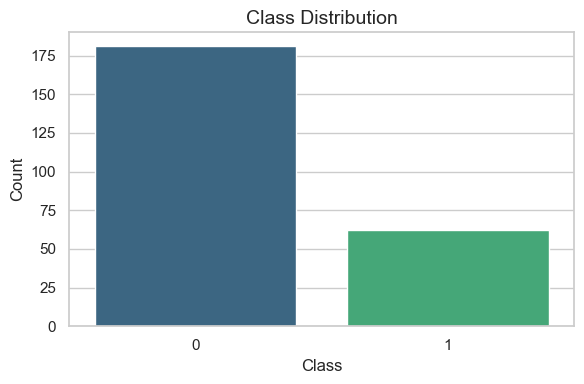

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot class distribution safely
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=dataset, hue='Class', palette='viridis', legend=False)

plt.title("Class Distribution", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


## Data balncing

New class distribution after SMOTE: Counter({1: 181, 0: 181})


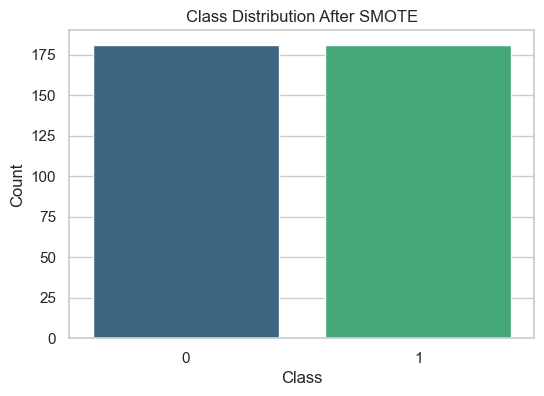

In [107]:
# Separate features and target
X = dataset.drop('Class', axis=1)
y = dataset['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# ✅ Confirm new class distribution
class_counts = Counter(y_balanced)
print("New class distribution after SMOTE:", class_counts)

# 📊 Plot the new distribution (fixed version)
df_bal = pd.DataFrame.from_dict(class_counts, orient='index').reset_index()
df_bal.columns = ['Class', 'Count']

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(data=df_bal, x='Class', y='Count', hue='Class', dodge=False, palette="viridis", legend=False)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [108]:
X

age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      2          2           2          0          1          3       1   
1      3          0           2          0          0          1       1   
2      3          0           6          0          0          2       0   
3      2          2           6          0          1          3       1   
4      3          2           4          4          0          2       1   
..   ...        ...         ...        ...        ...        ...     ...   
252    4          0           2          0          0          3       1   
253    3          0           5          5          1          2       0   
254    3          2           4          4          1          2       0   
255    3          2           2          0          0          2       1   
256    3          0           7          0          0          3       0   

     breast-quad  irradiat  
0              2         0  
1              0         0  
2              1         0  
3              1         1  
4              2         1  
..           ...       ...  
252            2         1  
253            1         0  
254            1         1  
255            1         0  
256            4         0  

[243 rows x 9 columns]

In [109]:
y

0      1
1      0
2      1
3      0
4      0
      ..
252    0
253    0
254    0
255    0
256    0
Name: Class, Length: 243, dtype: int32

In [110]:
X_balanced

age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      2          2           2          0          1          3       1   
1      3          0           2          0          0          1       1   
2      3          0           6          0          0          2       0   
3      2          2           6          0          1          3       1   
4      3          2           4          4          0          2       1   
..   ...        ...         ...        ...        ...        ...     ...   
357    2          2           5          0          0          3       0   
358    1          2           4          4          0          3       0   
359    2          0           3          0          0          2       1   
360    3          0           6          5          1          3       0   
361    4          0           3          0          0          3       0   

     breast-quad  irradiat  
0              2         0  
1              0         0  
2              1         0  
3              1         1  
4              2         1  
..           ...       ...  
357            4         0  
358            1         1  
359            0         0  
360            1         0  
361            1         0  

[362 rows x 9 columns]

In [111]:
y_balanced

0      1
1      0
2      1
3      0
4      0
      ..
357    1
358    1
359    1
360    1
361    1
Name: Class, Length: 362, dtype: int32

In [112]:
from collections import Counter
print(Counter(y))          # Before SMOTE
print(Counter(y_balanced)) # After SMOTE


Counter({0: 181, 1: 62})
Counter({1: 181, 0: 181})


## Feature Selection code

In [113]:
'''# 🎯 Select top 5 features using chi-squared test
selector = SelectKBest(score_func=chi2, k=5)
X_selected = selector.fit_transform(X_balanced, y_balanced)

# 📝 Get names of selected features (only works if X_balanced is a DataFrame)
selected_feature_names = X_balanced.columns[selector.get_support()]
print("✅ Selected Features:")
print(selected_feature_names)

# 📊 Optional: Show feature scores
feature_scores = pd.DataFrame({
    'Feature': X_balanced.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("\n📈 Feature Scores:")
print(feature_scores.head(10))'''


'# 🎯 Select top 5 features using chi-squared test\nselector = SelectKBest(score_func=chi2, k=5)\nX_selected = selector.fit_transform(X_balanced, y_balanced)\n\n# 📝 Get names of selected features (only works if X_balanced is a DataFrame)\nselected_feature_names = X_balanced.columns[selector.get_support()]\nprint("✅ Selected Features:")\nprint(selected_feature_names)\n\n# 📊 Optional: Show feature scores\nfeature_scores = pd.DataFrame({\n    \'Feature\': X_balanced.columns,\n    \'Score\': selector.scores_\n}).sort_values(by=\'Score\', ascending=False)\n\nprint("\n📈 Feature Scores:")\nprint(feature_scores.head(10))'

In [114]:
# 🐱 Train a CatBoost model to get feature importances
model = CatBoostClassifier(verbose=0, random_seed=42)
model.fit(X_balanced, y_balanced)

# 📊 Get feature importances
importances = model.get_feature_importance()
feature_names = X_balanced.columns

# 📝 Create a DataFrame for feature importance
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ✅ Select top 5 features
top_features = feature_scores.head(5)['Feature'].values
X_selected = X_balanced[top_features]

print("✅ Selected Features by CatBoost:")
print(top_features)

print("\n📈 Feature Importances:")
print(feature_scores.head(10))


✅ Selected Features by CatBoost:
['tumor-size' 'deg-malig' 'breast-quad' 'age' 'breast']

📈 Feature Importances:
       Feature  Importance
2   tumor-size   20.494433
5    deg-malig   14.947017
7  breast-quad   14.078017
0          age   13.295439
6       breast   11.308446
1    menopause    9.398553
3    inv-nodes    9.385752
4    node-caps    3.918711
8     irradiat    3.173632


In [115]:
feature_scores

Feature  Importance
2   tumor-size   20.494433
5    deg-malig   14.947017
7  breast-quad   14.078017
0          age   13.295439
6       breast   11.308446
1    menopause    9.398553
3    inv-nodes    9.385752
4    node-caps    3.918711
8     irradiat    3.173632

In [116]:
dataset

age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      2          2           2          0          1          3       1   
1      3          0           2          0          0          1       1   
2      3          0           6          0          0          2       0   
3      2          2           6          0          1          3       1   
4      3          2           4          4          0          2       1   
..   ...        ...         ...        ...        ...        ...     ...   
252    4          0           2          0          0          3       1   
253    3          0           5          5          1          2       0   
254    3          2           4          4          1          2       0   
255    3          2           2          0          0          2       1   
256    3          0           7          0          0          3       0   

     breast-quad  irradiat  Class  
0              2         0      1  
1              0         0      0  
2              1         0      1  
3              1         1      0  
4              2         1      0  
..           ...       ...    ...  
252            2         1      0  
253            1         0      0  
254            1         1      0  
255            1         0      0  
256            4         0      0  

[243 rows x 10 columns]

## Kfold 

In [117]:
'''# 🧪 Step 1: Split into Train and Test Set (80/20)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_selected, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# 🔁 Step 2: Convert to NumPy arrays for KFold indexing
X_train_np = X_train_full if isinstance(X_train_full, np.ndarray) else X_train_full
y_train_np = y_train_full if isinstance(y_train_full, np.ndarray) else y_train_full.to_numpy()

# 🌀 Step 3: 10-Fold Cross Validation on training data only
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_np, y_train_np), 1):
    X_train = X_train_np[train_idx]
    y_train = y_train_np[train_idx]
    X_val = X_train_np[val_idx]
    y_val = y_train_np[val_idx]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    print(f"✅ Fold {fold} Accuracy: {acc:.4f}")

# 📊 Average result (optional)
print("\n🔹 Average CV Accuracy:", np.mean(accuracies))
print("🔹 CV Accuracy Std Dev:", np.std(accuracies))'''


'# 🧪 Step 1: Split into Train and Test Set (80/20)\nX_train_full, X_test, y_train_full, y_test = train_test_split(\n    X_selected, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced\n)\n\n# 🔁 Step 2: Convert to NumPy arrays for KFold indexing\nX_train_np = X_train_full if isinstance(X_train_full, np.ndarray) else X_train_full\ny_train_np = y_train_full if isinstance(y_train_full, np.ndarray) else y_train_full.to_numpy()\n\n# 🌀 Step 3: 10-Fold Cross Validation on training data only\nskf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)\naccuracies = []\n\nfor fold, (train_idx, val_idx) in enumerate(skf.split(X_train_np, y_train_np), 1):\n    X_train = X_train_np[train_idx]\n    y_train = y_train_np[train_idx]\n    X_val = X_train_np[val_idx]\n    y_val = y_train_np[val_idx]\n\n    model = RandomForestClassifier(random_state=42)\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_val)\n\n    acc = accuracy_score(y_val, y_pred)\n    accuracies.append(a

In [118]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 🧪 Step 1: Split into Train and Test Set (80/20)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_selected, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# 🌀 Step 2: 10-Fold Cross Validation on training data only
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
    # ✅ Use .iloc to index rows by integer position
    X_train = X_train_full.iloc[train_idx]
    y_train = y_train_full.iloc[train_idx]
    X_val = X_train_full.iloc[val_idx]
    y_val = y_train_full.iloc[val_idx]

    # Model training and evaluation
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    print(f"✅ Fold {fold} Accuracy: {acc:.4f}")

# 📊 Average result (optional)
print("\n🔹 Average CV Accuracy:", np.mean(accuracies))
print("🔹 CV Accuracy Std Dev:", np.std(accuracies))


✅ Fold 1 Accuracy: 0.6207
✅ Fold 2 Accuracy: 0.7241
✅ Fold 3 Accuracy: 0.6897
✅ Fold 4 Accuracy: 0.6207
✅ Fold 5 Accuracy: 0.6897
✅ Fold 6 Accuracy: 0.5862
✅ Fold 7 Accuracy: 0.7241
✅ Fold 8 Accuracy: 0.6897
✅ Fold 9 Accuracy: 0.5862
✅ Fold 10 Accuracy: 0.7500

🔹 Average CV Accuracy: 0.6681034482758621
🔹 CV Accuracy Std Dev: 0.05682466723336897


## Confuision Matrix

In [119]:
'''from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 🧠 Train final model on full training data
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_np, y_train_np)

# 🎯 Predict on 20% held-out test data
y_test_pred = final_model.predict(X_test)

# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("🧾 Classification Report:\n")
print(classification_report(y_test, y_test_pred))

# 📊 Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Final Test Set")
plt.show()'''


'from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay\nimport matplotlib.pyplot as plt\n\n# 🧠 Train final model on full training data\nfinal_model = RandomForestClassifier(random_state=42)\nfinal_model.fit(X_train_np, y_train_np)\n\n# 🎯 Predict on 20% held-out test data\ny_test_pred = final_model.predict(X_test)\n\n# 📉 Confusion Matrix\ncm = confusion_matrix(y_test, y_test_pred)\nprint("🧾 Classification Report:\n")\nprint(classification_report(y_test, y_test_pred))\n\n# 📊 Display Confusion Matrix\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm)\ndisp.plot(cmap=\'Blues\')\nplt.title("Confusion Matrix on Final Test Set")\nplt.show()'

🧾 Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        37
           1       0.72      0.72      0.72        36

    accuracy                           0.73        73
   macro avg       0.73      0.73      0.73        73
weighted avg       0.73      0.73      0.73        73



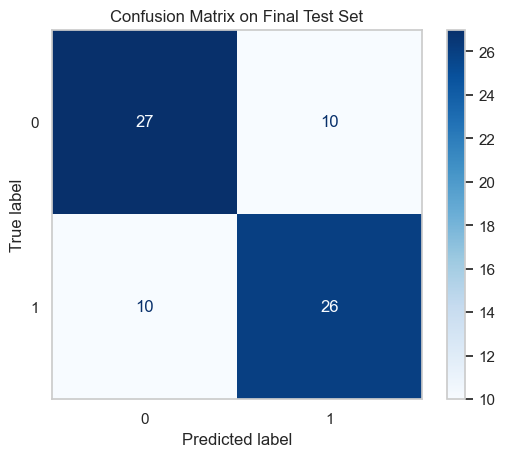

In [120]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# ✅ Convert train/test sets to NumPy
X_train_np = X_train_full.to_numpy()
y_train_np = y_train_full.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# 🧠 Train final model on full training data
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_np, y_train_np)

# 🎯 Predict on test data
y_test_pred = final_model.predict(X_test_np)

# 📉 Confusion Matrix and Report
cm = confusion_matrix(y_test_np, y_test_pred)
print("🧾 Classification Report:\n")
print(classification_report(y_test_np, y_test_pred))

# 📊 Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Final Test Set")
plt.grid(False)
plt.show()


## Classification

In [121]:
'''# Define classifiers dictionary
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Loop through each classifier using your existing 10-fold setup
print("🔁 10-Fold Cross-Validation Accuracies:\n")
for name, model in classifiers.items():
    accuracies = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_np, y_train_np), 1):
        X_train = X_train_np[train_idx]
        y_train = y_train_np[train_idx]
        X_val = X_train_np[val_idx]
        y_val = y_train_np[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        accuracies.append(acc)

    print(f"✅ {name}:")
    print(f"   🔹 Mean Accuracy: {np.mean(accuracies):.4f}")
    print(f"   🔹 Std Dev: {np.std(accuracies):.4f}\n")'''


'# Define classifiers dictionary\nclassifiers = {\n    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),\n    "K-Nearest Neighbors": KNeighborsClassifier(),\n    "Support Vector Machine": SVC(),\n    "Naive Bayes": GaussianNB(),\n    "Decision Tree": DecisionTreeClassifier(random_state=42),\n    "Random Forest": RandomForestClassifier(random_state=42),\n    "AdaBoost": AdaBoostClassifier(algorithm="SAMME", random_state=42),\n    "Gradient Boosting": GradientBoostingClassifier(random_state=42)\n}\n\n# Loop through each classifier using your existing 10-fold setup\nprint("🔁 10-Fold Cross-Validation Accuracies:\n")\nfor name, model in classifiers.items():\n    accuracies = []\n\n    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_np, y_train_np), 1):\n        X_train = X_train_np[train_idx]\n        y_train = y_train_np[train_idx]\n        X_val = X_train_np[val_idx]\n        y_val = y_train_np[val_idx]\n\n        model.fit(X_train, y_train)\n       

🔁 10-Fold Cross-Validation Accuracies:

✅ Logistic Regression:
   🔹 Mean Accuracy: 0.6163
   🔹 Std Dev: 0.0683

✅ K-Nearest Neighbors:
   🔹 Mean Accuracy: 0.6922
   🔹 Std Dev: 0.0636

✅ Support Vector Machine:
   🔹 Mean Accuracy: 0.6680
   🔹 Std Dev: 0.0632

✅ Naive Bayes:
   🔹 Mean Accuracy: 0.6437
   🔹 Std Dev: 0.0921

✅ Decision Tree:
   🔹 Mean Accuracy: 0.6298
   🔹 Std Dev: 0.0884

✅ Random Forest:
   🔹 Mean Accuracy: 0.6681
   🔹 Std Dev: 0.0568

✅ AdaBoost:
   🔹 Mean Accuracy: 0.6163
   🔹 Std Dev: 0.1191

✅ Gradient Boosting:
   🔹 Mean Accuracy: 0.6889
   🔹 Std Dev: 0.0761

📋 Final Model Evaluation (Random Forest):

🧾 Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        37
           1       0.72      0.72      0.72        36

    accuracy                           0.73        73
   macro avg       0.73      0.73      0.73        73
weighted avg       0.73      0.73      0.73        73



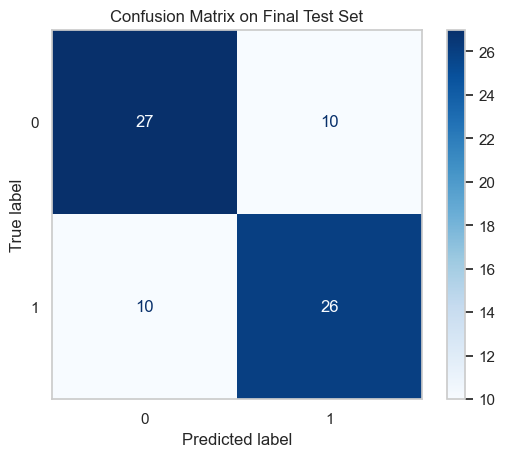

In [122]:
# 🧪 Step 1: Train/Test Split (80/20)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_selected, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

# 🧬 Convert to NumPy for model input
X_train_np = X_train_full.to_numpy()
y_train_np = y_train_full.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# 🌀 Step 2: Cross-Validation Setup
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 🧠 Define all classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 🔁 10-Fold Cross-Validation
print("🔁 10-Fold Cross-Validation Accuracies:\n")
for name, model in classifiers.items():
    accuracies = []
    for train_idx, val_idx in skf.split(X_train_np, y_train_np):
        X_train, X_val = X_train_np[train_idx], X_train_np[val_idx]
        y_train, y_val = y_train_np[train_idx], y_train_np[val_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        accuracies.append(accuracy_score(y_val, y_pred))
    print(f"✅ {name}:")
    print(f"   🔹 Mean Accuracy: {np.mean(accuracies):.4f}")
    print(f"   🔹 Std Dev: {np.std(accuracies):.4f}\n")

# 🧠 Final Model Training on Full Training Data (Random Forest)
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_np, y_train_np)

# 🎯 Prediction on Test Set
y_test_pred = final_model.predict(X_test_np)

# 📊 Evaluation
print("📋 Final Model Evaluation (Random Forest):\n")
print("🧾 Classification Report:\n")
print(classification_report(y_test_np, y_test_pred))

# 📉 Confusion Matrix
cm = confusion_matrix(y_test_np, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Final Test Set")
plt.grid(False)
plt.show()


## Using confuision matrix check all things of Classifier

In [123]:
'''from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import pandas as pd

# Store results
results = []

print("🧪 Final Evaluation Summary on Test Set\n")

for name, model in classifiers.items():
    # Train the model on full training data
    model.fit(X_train_np, y_train_np)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Add to results list
    results.append({
        "Classifier": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Confusion Matrix": cm.tolist()  # Convert to regular list for display
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display full results table
pd.set_option('display.max_colwidth', None)
print(results_df[["Classifier", "Accuracy", "Precision", "Recall", "F1-Score", "Confusion Matrix"]])'''


'from sklearn.metrics import (\n    accuracy_score, precision_score, recall_score, f1_score,\n    confusion_matrix, classification_report\n)\nimport pandas as pd\n\n# Store results\nresults = []\n\nprint("🧪 Final Evaluation Summary on Test Set\n")\n\nfor name, model in classifiers.items():\n    # Train the model on full training data\n    model.fit(X_train_np, y_train_np)\n\n    # Predict on the test set\n    y_pred = model.predict(X_test)\n\n    # Compute metrics\n    acc = accuracy_score(y_test, y_pred)\n    prec = precision_score(y_test, y_pred)\n    rec = recall_score(y_test, y_pred)\n    f1 = f1_score(y_test, y_pred)\n    cm = confusion_matrix(y_test, y_pred)\n\n    # Add to results list\n    results.append({\n        "Classifier": name,\n        "Accuracy": acc,\n        "Precision": prec,\n        "Recall": rec,\n        "F1-Score": f1,\n        "Confusion Matrix": cm.tolist()  # Convert to regular list for display\n    })\n\n# Convert results to a DataFrame\nresults_df = pd.Dat

In [124]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)
import pandas as pd

# Store results
results = []

print("🧪 Final Evaluation Summary on Test Set\n")

for name, model in classifiers.items():
    # Train the model on full training data
    model.fit(X_train_np, y_train_np)

    # Predict on the test set
    y_pred = model.predict(X_test_np)

    # Compute probabilities for ROC AUC (only if supported)
    try:
        y_prob = model.predict_proba(X_test_np)[:, 1]  # for binary classification
        roc_auc = roc_auc_score(y_test_np, y_prob)
    except:
        roc_auc = "N/A"

    # Compute other metrics
    acc = accuracy_score(y_test_np, y_pred)
    prec = precision_score(y_test_np, y_pred)
    rec = recall_score(y_test_np, y_pred)
    f1 = f1_score(y_test_np, y_pred)
    cm = confusion_matrix(y_test_np, y_pred)

    # Add to results list
    results.append({
        "Classifier": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC AUC": roc_auc,
        "Confusion Matrix": cm.tolist()  # Convert to regular list for display
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display full results table
pd.set_option('display.max_colwidth', None)
print(results_df[["Classifier", "Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC", "Confusion Matrix"]])


🧪 Final Evaluation Summary on Test Set

               Classifier  Accuracy  Precision    Recall  F1-Score   ROC AUC  \
0     Logistic Regression  0.630137   0.615385  0.666667  0.640000  0.748123   
1     K-Nearest Neighbors  0.726027   0.673913  0.861111  0.756098  0.742117   
2  Support Vector Machine  0.698630   0.652174  0.833333  0.731707  0.749625   
3             Naive Bayes  0.671233   0.625000  0.833333  0.714286  0.774399   
4           Decision Tree  0.657534   0.634146  0.722222  0.675325  0.635511   
5           Random Forest  0.726027   0.722222  0.722222  0.722222  0.823574   
6                AdaBoost  0.726027   0.690476  0.805556  0.743590  0.783784   
7       Gradient Boosting  0.767123   0.743590  0.805556  0.773333  0.754880   

       Confusion Matrix  
0  [[22, 15], [12, 24]]  
1   [[22, 15], [5, 31]]  
2   [[21, 16], [6, 30]]  
3   [[19, 18], [6, 30]]  
4  [[22, 15], [10, 26]]  
5  [[27, 10], [10, 26]]  
6   [[24, 13], [7, 29]]  
7   [[27, 10], [7, 29]]  


In [125]:
dataset

age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      2          2           2          0          1          3       1   
1      3          0           2          0          0          1       1   
2      3          0           6          0          0          2       0   
3      2          2           6          0          1          3       1   
4      3          2           4          4          0          2       1   
..   ...        ...         ...        ...        ...        ...     ...   
252    4          0           2          0          0          3       1   
253    3          0           5          5          1          2       0   
254    3          2           4          4          1          2       0   
255    3          2           2          0          0          2       1   
256    3          0           7          0          0          3       0   

     breast-quad  irradiat  Class  
0              2         0      1  
1              0         0      0  
2              1         0      1  
3              1         1      0  
4              2         1      0  
..           ...       ...    ...  
252            2         1      0  
253            1         0      0  
254            1         1      0  
255            1         0      0  
256            4         0      0  

[243 rows x 10 columns]